In [95]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sms
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [96]:
data=pd.read_csv('ToyotaCorolla .csv',encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [98]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [99]:
data.shape

(1436, 38)

In [100]:
data = data[['Price','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Age_08_04']]
data

,Price,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Age_08_04
0,13500,46986,90,2000,3,5,210,1165,23
1,13750,72937,90,2000,3,5,210,1165,23
2,13950,41711,90,2000,3,5,210,1165,24
3,14950,48000,90,2000,3,5,210,1165,26
4,13750,38500,90,2000,3,5,210,1170,30
...,...,...,...,...,...,...,...,...,...
1431,7500,20544,86,1300,3,5,69,1025,69
1432,10845,19000,86,1300,3,5,69,1015,72
1433,8500,17016,86,1300,3,5,69,1015,71
1434,7250,16916,86,1300,3,5,69,1015,70


In [101]:
data.describe()

,Price,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Age_08_04
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,10730.824513,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,55.947075
std,3626.964585,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,18.599988
min,4350.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,1.000000
25%,8450.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,44.000000
50%,9900.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,61.000000
75%,11950.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,70.000000
max,32500.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,80.000000


In [102]:
data.drop(['Doors','Gears'],axis = 1)

,Price,KM,HP,cc,Quarterly_Tax,Weight,Age_08_04
0,13500,46986,90,2000,210,1165,23
1,13750,72937,90,2000,210,1165,23
2,13950,41711,90,2000,210,1165,24
3,14950,48000,90,2000,210,1165,26
4,13750,38500,90,2000,210,1170,30
...,...,...,...,...,...,...,...
1431,7500,20544,86,1300,69,1025,69
1432,10845,19000,86,1300,69,1015,72
1433,8500,17016,86,1300,69,1015,71
1434,7250,16916,86,1300,69,1015,70


In [103]:
data.corr()

,Price,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Age_08_04
Price,1.000000,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,-0.876590
KM,-0.569960,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,0.505672
HP,0.314990,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,-0.156622
cc,0.126389,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,-0.098084
Doors,0.185326,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,-0.148359
Gears,0.063104,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,-0.005364
Quarterly_Tax,0.219197,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,-0.198431
Weight,0.581198,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,-0.470253
Age_08_04,-0.876590,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,1.000000


<AxesSubplot:>

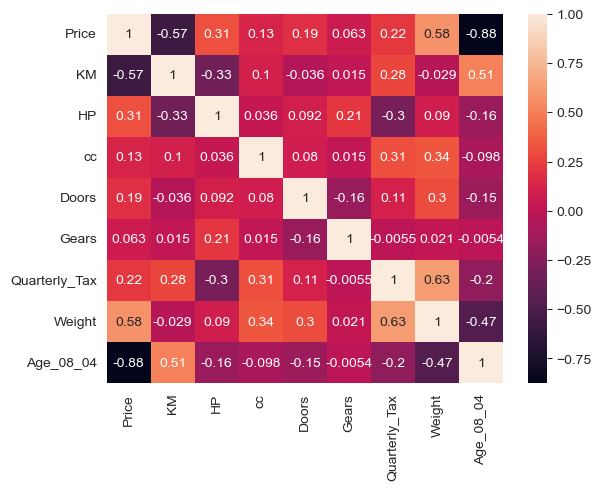

In [104]:
sns.heatmap(data.corr(),annot=True)

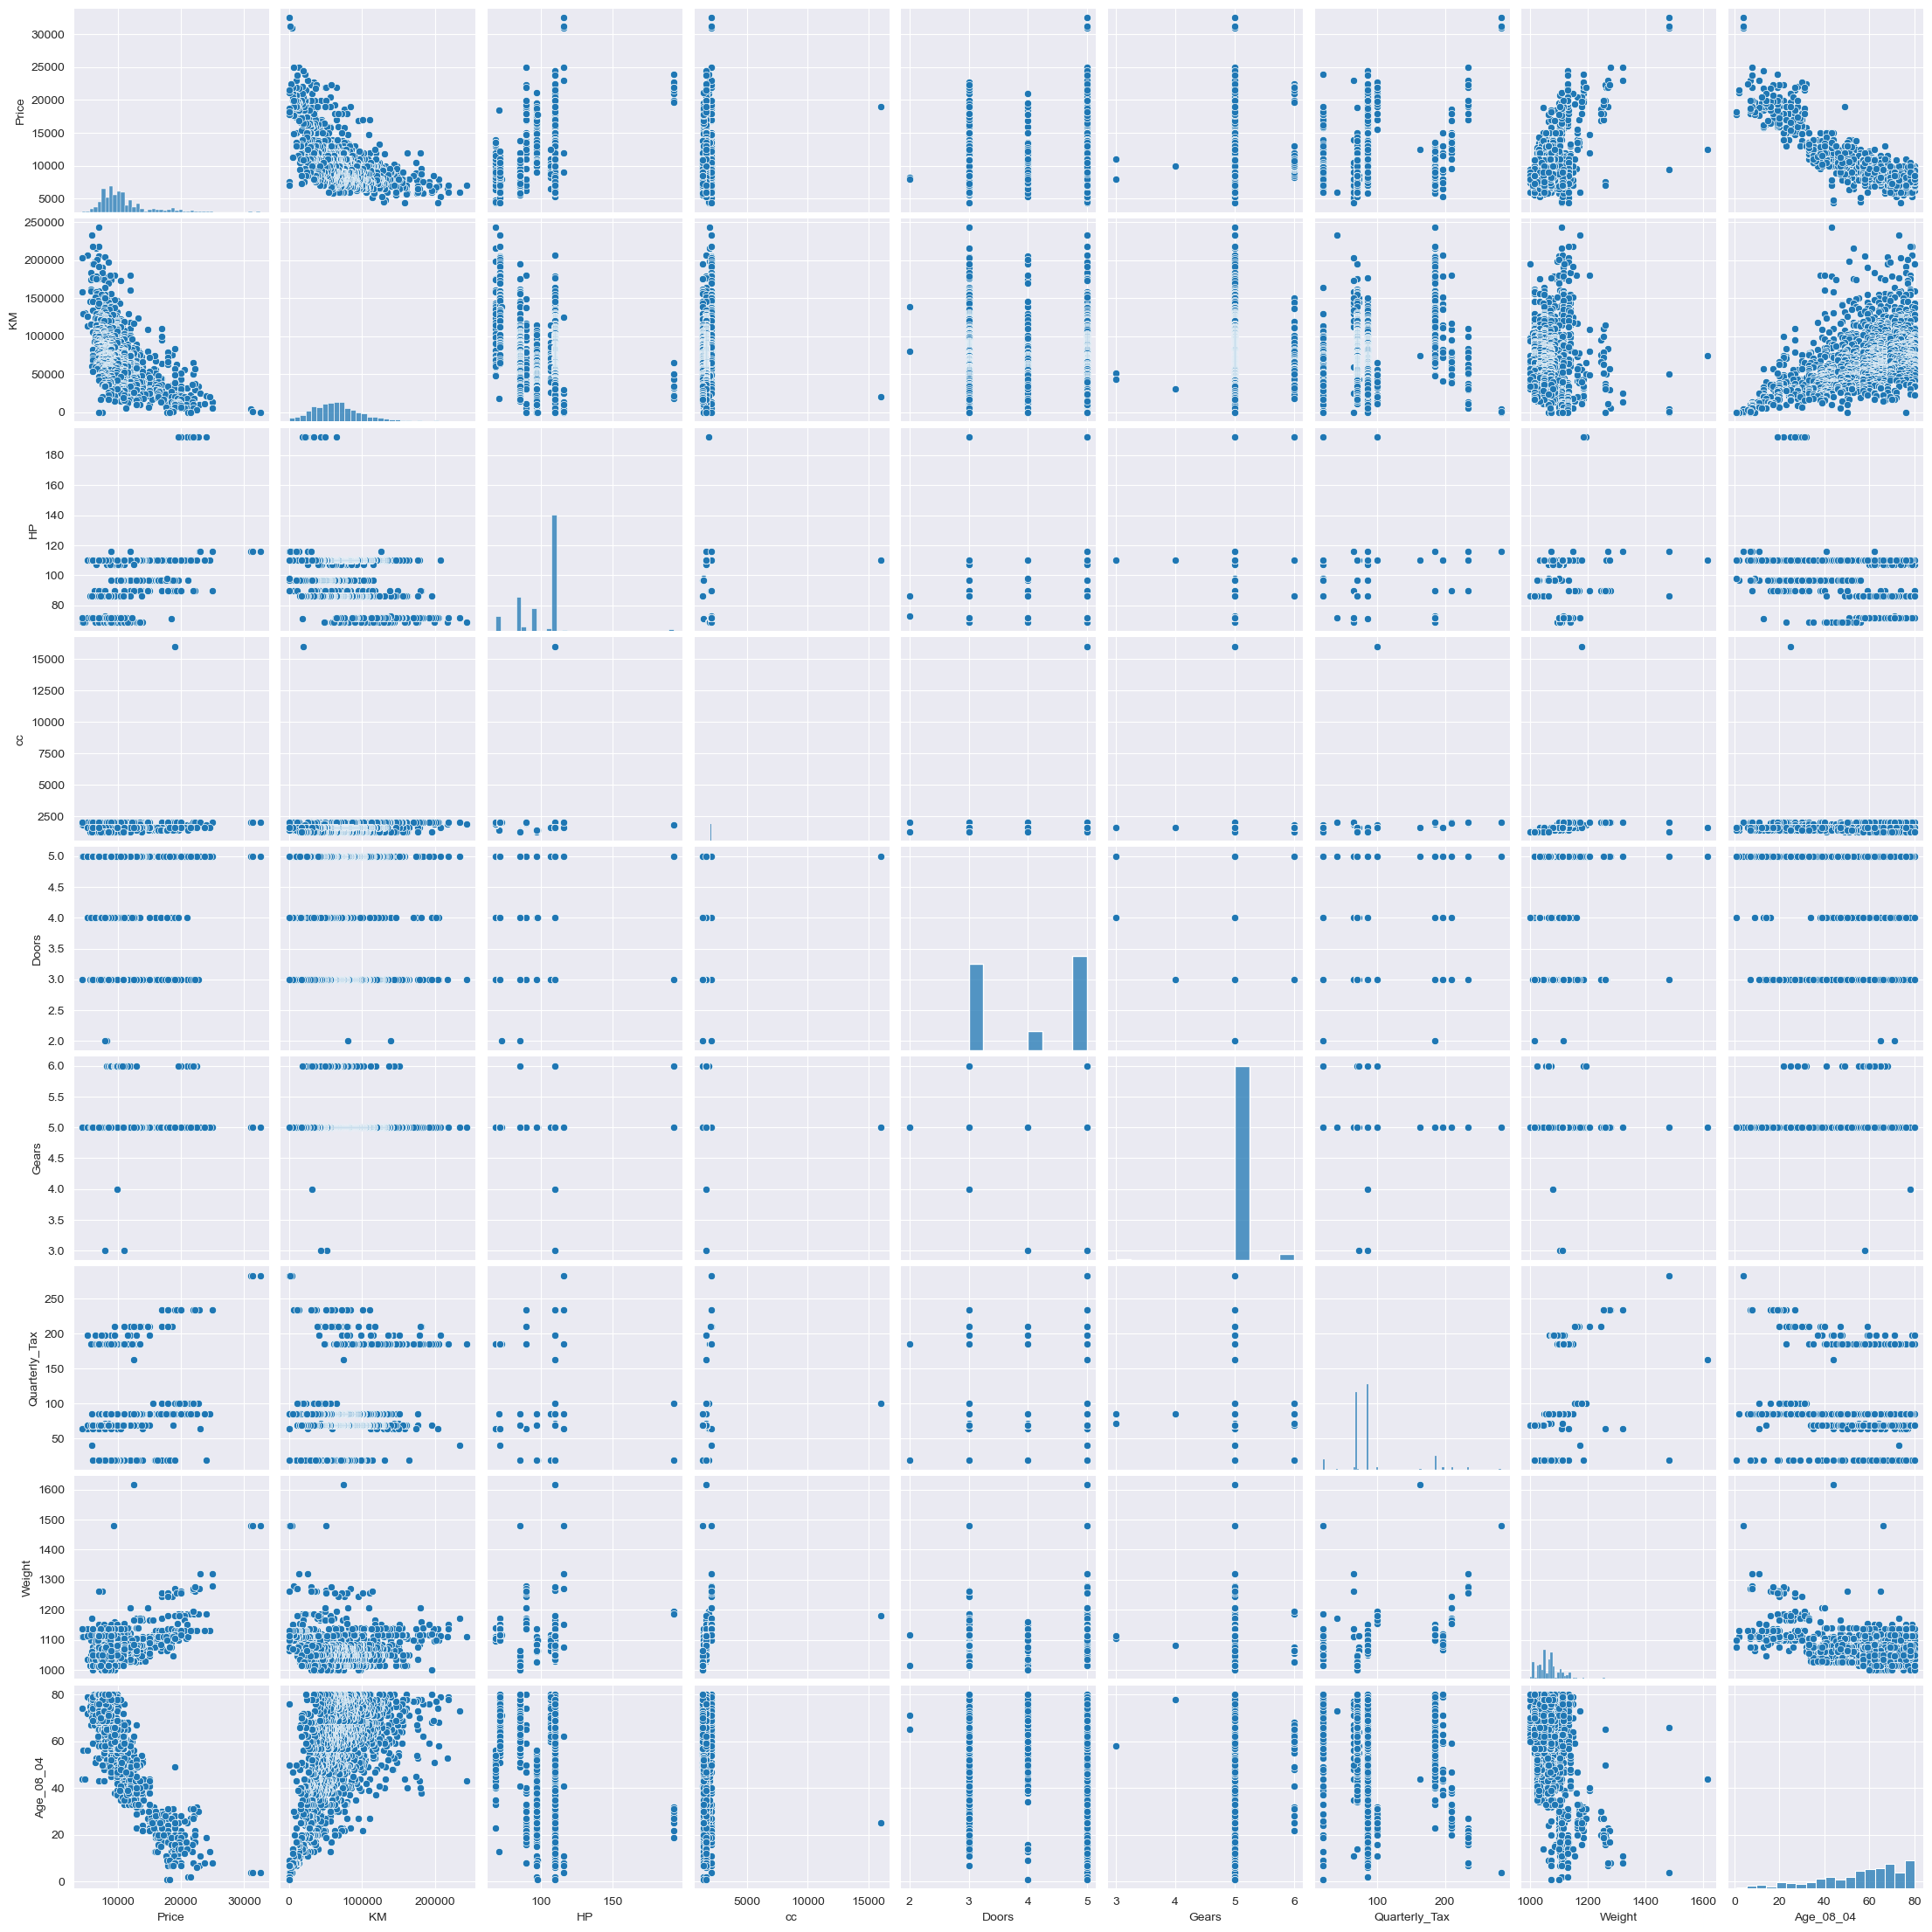

In [105]:
sns.set_style(style='darkgrid')
sns.pairplot(data)
plt.show()

In [106]:
model = sms.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight',data=data).fit()

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        13:41:32   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2669.4843   1051.241     -2.539      0.011   -4731.625    -607.344
Age_08_04      -121.7929      2.622    -46.449      0.000    -126.937    -116.649
KM               -0.0205      0.001    -16.411      0.000      -0.023      -0.018
HP               33.6858      2.741     12.288      0.000      28.308      39.063
cc               -0.1244      0.090     -1.377      0.169      -0.302       0.053
Quarterly_Tax     4.1922      1.307      3.207      0.001       1.628       6.757
Weight           16.8156      1.036     16.239      0.000      14.784      18.847
==============================================================================
Omnibus:                      148.179   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              952.170
Skew:                          -0.220   Prob(JB):                    1.73e-207
Kurtosis:                       6.965   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
model.params

Intercept       -2669.484315
Age_08_04        -121.792943
KM                 -0.020546
HP                 33.685785
cc                 -0.124385
Quarterly_Tax       4.192242
Weight             16.815621
dtype: float64

In [109]:
data=data.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)
data

,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
0,13500,46986,90,2000,3,5,210,1165,23
1,13750,72937,90,2000,3,5,210,1165,23
2,13950,41711,90,2000,3,5,210,1165,24
3,14950,48000,90,2000,3,5,210,1165,26
4,13750,38500,90,2000,3,5,210,1170,30
...,...,...,...,...,...,...,...,...,...
1431,7500,20544,86,1300,3,5,69,1025,69
1432,10845,19000,86,1300,3,5,69,1015,72
1433,8500,17016,86,1300,3,5,69,1015,71
1434,7250,16916,86,1300,3,5,69,1015,70


In [110]:
rsq_wt = sms.ols("Weight~QT+HP+Age+cc",data = data).fit().rsquared
vif_wt = 1/(1-rsq_wt) 
rsq_qt = sms.ols("QT~Weight+HP+Age+cc",data = data).fit().rsquared
vif_qt = 1/(1-rsq_qt) 
rsq_hp = sms.ols("HP~Weight+QT+Age+cc",data = data).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_age =sms.ols("Age~Weight+HP+QT+cc",data = data).fit().rsquared
vif_age = 1/(1-rsq_age)
rsq_cc = sms.ols("cc~Age+HP+QT+Weight",data = data).fit().rsquared
vif_cc = 1/(1-rsq_cc)
d = {'Variables':['Weight','QT','HP','cc','Age'],'VIF':[vif_wt,vif_qt,vif_hp,vif_age,vif_cc]}
vif_frame = pd.DataFrame(d)
vif_frame

,Variables,VIF
0,Weight,2.349166
1,QT,2.140673
2,HP,1.289038
3,cc,1.321768
4,Age,1.157660


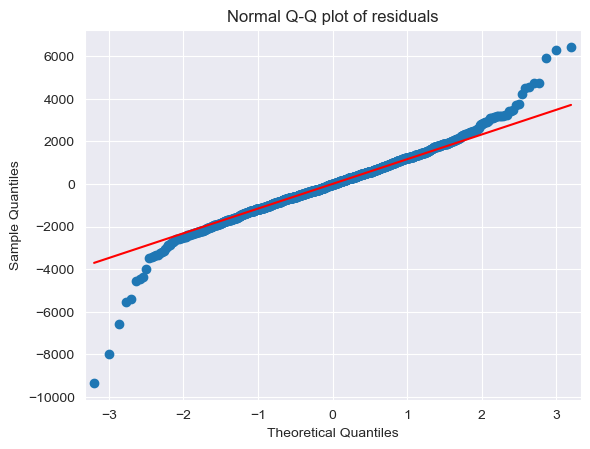

In [111]:
#checking for normality of residuals 
sm.qqplot(model.resid,line = 'q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [112]:
#locating our residual errors
list(np.where(model.resid >6000))

[array([147, 523], dtype=int64)]

In [113]:
#locating our residual errors
list(np.where(model.resid < -6000))

[array([221, 601, 960], dtype=int64)]

In [114]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()


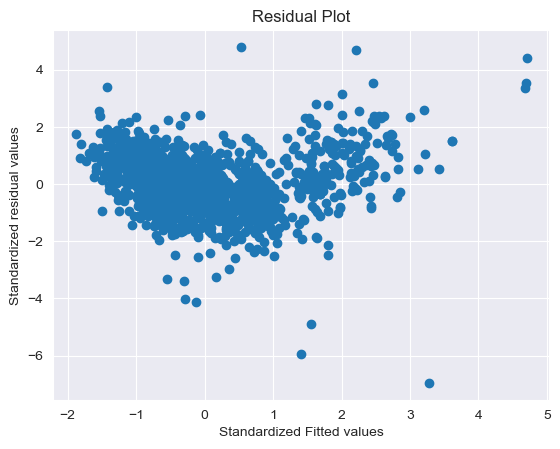

In [115]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [116]:
(t,_)= model.get_influence().cooks_distance
t

array([7.94634117e-03, 4.31088094e-03, 6.02396204e-03, ...,
       2.67194643e-06, 8.05624057e-04, 1.35714526e-02])

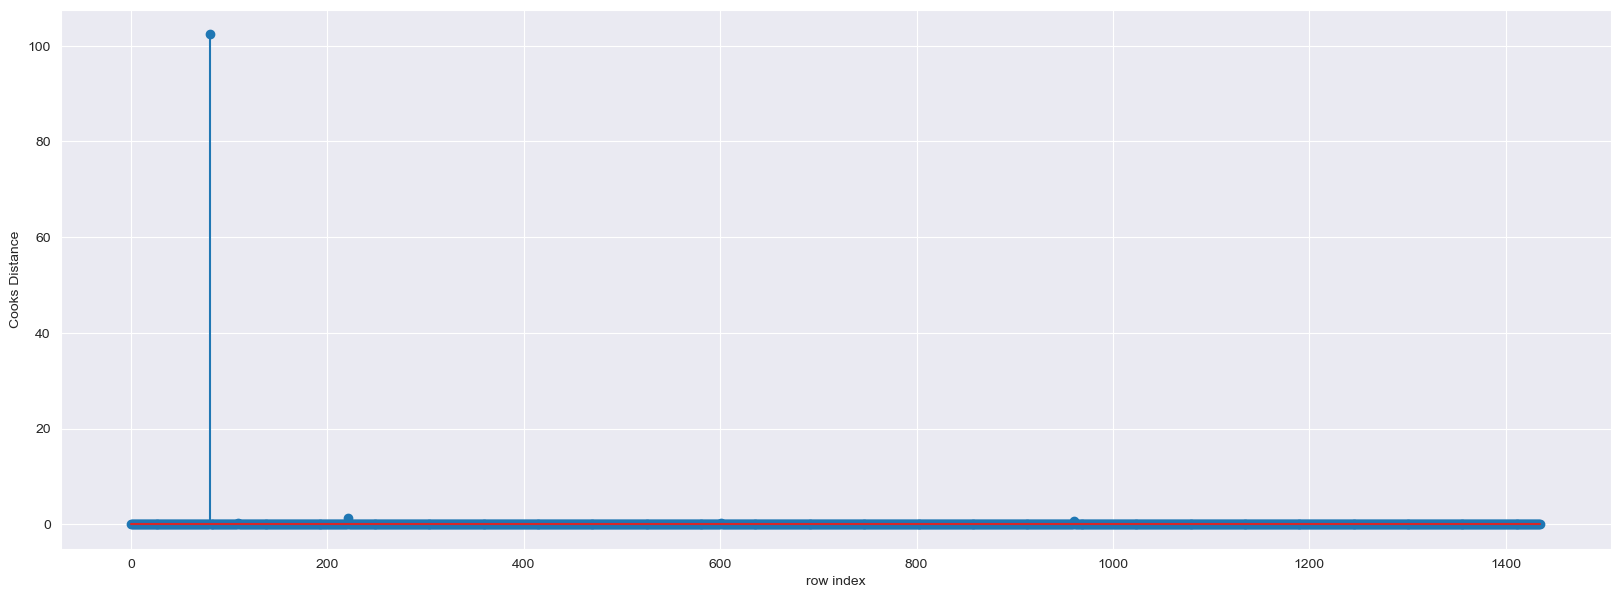

In [117]:
#plotting the stem plot for influencers
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(t,5))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [118]:
(np.argmax(t),np.max(t))

(80, 102.42006677713853)

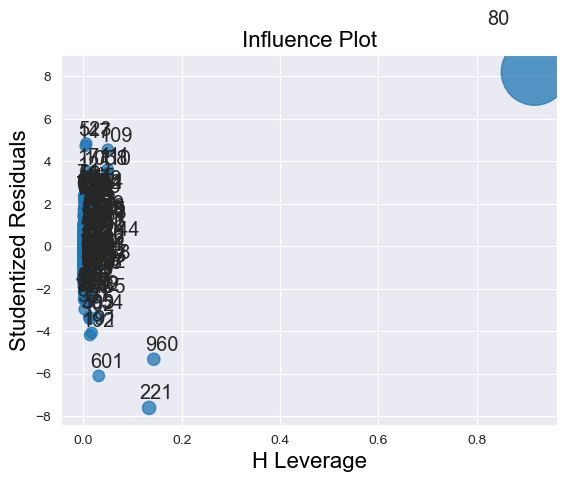

In [119]:
#computing out leverage value using high influence plot: points beyond our leverge_cutoff value are outliers
influence_plot(model)
plt.show()


In [120]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020891364902506964

In [121]:
data[data.index.isin([80])]


,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
80,18950,20019,110,16000,5,5,100,1180,25


In [122]:
data= data.drop(data.index[[80]],axis = 0).reset_index(drop = True)
data


,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
0,13500,46986,90,2000,3,5,210,1165,23
1,13750,72937,90,2000,3,5,210,1165,23
2,13950,41711,90,2000,3,5,210,1165,24
3,14950,48000,90,2000,3,5,210,1165,26
4,13750,38500,90,2000,3,5,210,1170,30
...,...,...,...,...,...,...,...,...,...
1430,7500,20544,86,1300,3,5,69,1025,69
1431,10845,19000,86,1300,3,5,69,1015,72
1432,8500,17016,86,1300,3,5,69,1015,71
1433,7250,16916,86,1300,3,5,69,1015,70


In [85]:
data=pd.read_csv('ToyotaCorolla .csv',encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [123]:
model= sms.ols("Price~Age+Weight+HP+cc+QT+KM",data = data).fit()

In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1573.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        13:42:06   Log-Likelihood:                -12339.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1428   BIC:                         2.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3643.4063   1034.489     -3.522      0.000   -5672.688   -1614.124
Age         -120.5692      2.568    -46.958      0.000    -125.606    -115.532
Weight        19.8727      1.079     18.423      0.000      17.757      21.989
HP            41.0948      2.828     14.532      0.000      35.548      46.642
cc            -2.5355      0.307     -8.264      0.000      -3.137      -1.934
QT             9.3512      1.424      6.565      0.000       6.557      12.145
KM            -0.0176      0.001    -13.812      0.000      -0.020      -0.015
==============================================================================
Omnibus:                      238.534   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2475.164
Skew:                          -0.431   Prob(JB):                         0.00
Kurtosis:                       9.376   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
(model.rsquared,model.aic)

(0.8685620493512142, 24692.22861659362)

In [126]:
model= sms.ols("Price~Age+Weight+HP+cc+QT+KM",data = data).fit()

In [127]:
(c,_)= model.get_influence().cooks_distance
c

array([7.46590503e-03, 3.91570024e-03, 5.43742321e-03, ...,
       1.33351891e-06, 1.03237734e-03, 1.21588637e-02])

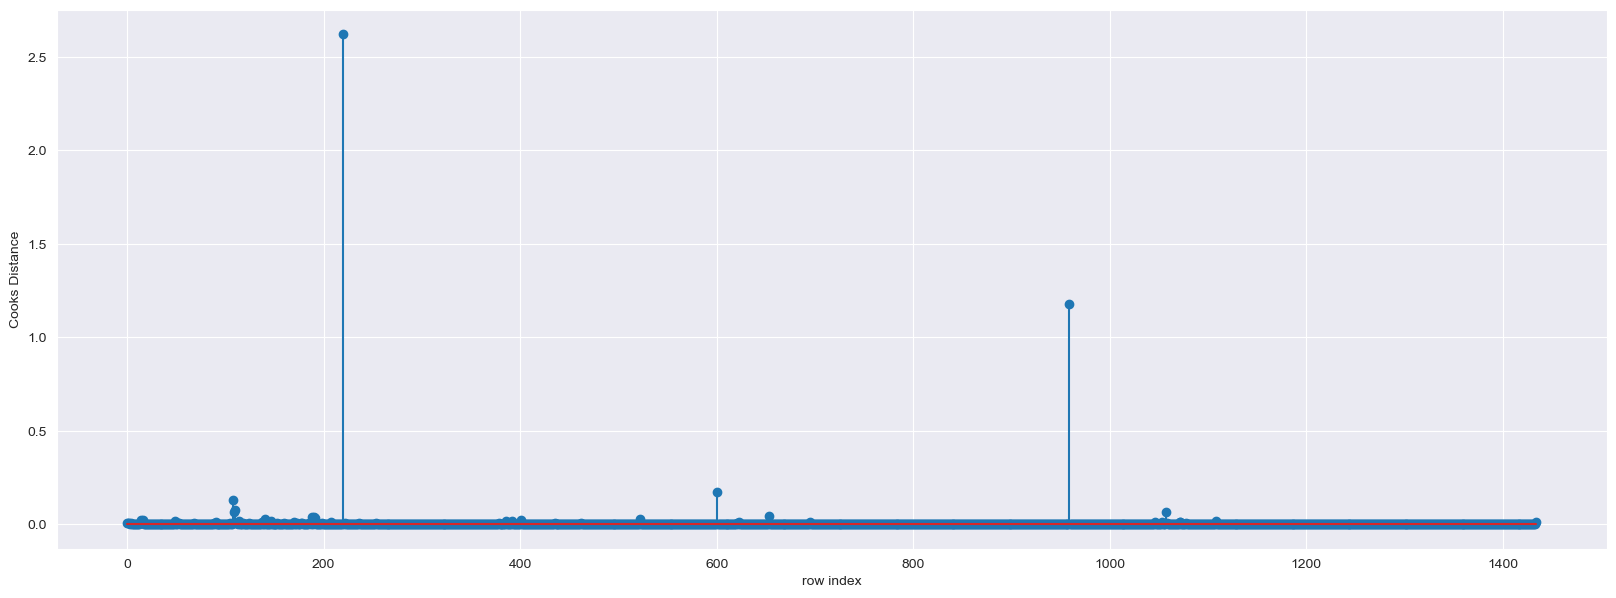

In [128]:
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()


In [129]:
np.argmax(c),np.max(c)

(220, 2.6212416618727943)

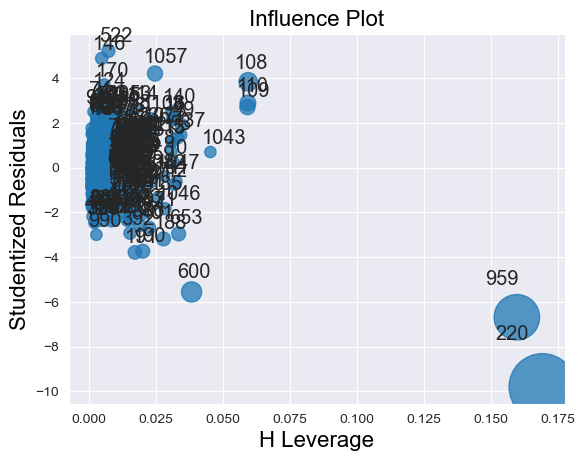

In [130]:
influence_plot(model)
plt.show()


In [131]:
data[data.index.isin([220])]

,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
220,12450,74172,110,1600,5,5,163,1615,44


In [132]:
data= data.drop(data.index[[220]],axis = 0).reset_index(drop = True)
data

,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
0,13500,46986,90,2000,3,5,210,1165,23
1,13750,72937,90,2000,3,5,210,1165,23
2,13950,41711,90,2000,3,5,210,1165,24
3,14950,48000,90,2000,3,5,210,1165,26
4,13750,38500,90,2000,3,5,210,1170,30
...,...,...,...,...,...,...,...,...,...
1429,7500,20544,86,1300,3,5,69,1025,69
1430,10845,19000,86,1300,3,5,69,1015,72
1431,8500,17016,86,1300,3,5,69,1015,71
1432,7250,16916,86,1300,3,5,69,1015,70


In [134]:
model = sms.ols("Price~Age+Weight+HP+cc+QT",data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1758.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        13:43:04   Log-Likelihood:                -12375.
No. Observations:                1434   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7902.6538   1149.585     -6.874      0.000   -1.02e+04   -5647.598
Age         -133.9869      2.329    -57.529      0.000    -138.556    -129.418
Weight        25.4932      1.213     21.019      0.000      23.114      27.872
HP            50.6086      2.816     17.972      0.000      45.085      56.132
cc            -4.4032      0.310    -14.200      0.000      -5.011      -3.795
QT             6.4373      1.465      4.393      0.000       3.563       9.312
==============================================================================
Omnibus:                      169.178   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.179
Skew:                          -0.357   Prob(JB):                    5.42e-224
Kurtosis:                       7.086   Cond. No.                     6.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
(p,_)= model.get_influence().cooks_distance
p

array([4.38874175e-03, 3.49219186e-03, 2.41421838e-03, ...,
       2.61601577e-04, 4.77221747e-05, 3.99958044e-03])

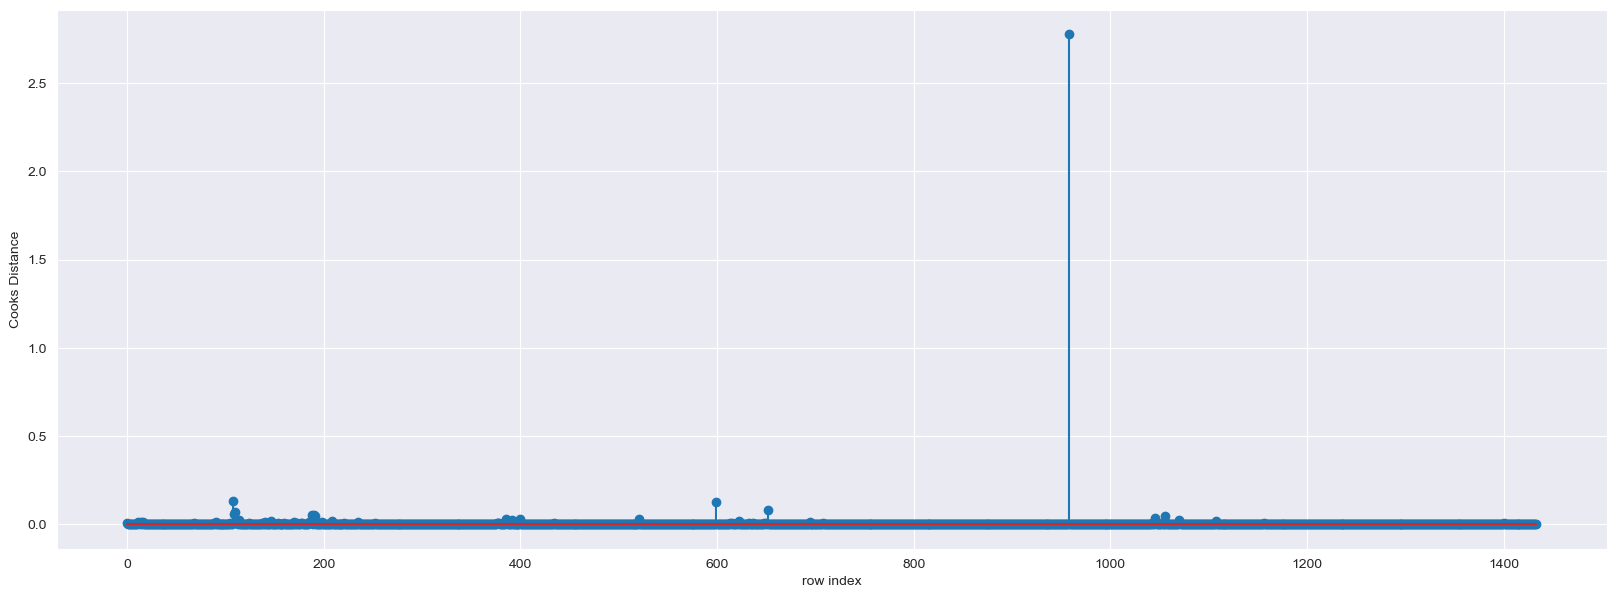

In [139]:
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(p,5))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [140]:
np.argmax(p),np.max(p)

(958, 2.777544450973422)

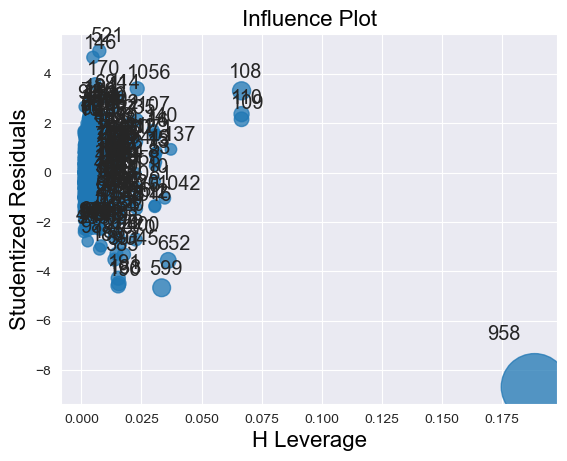

In [141]:
influence_plot(model)
plt.show()


In [143]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.02092050209205021

In [144]:
data[data.index.isin([958])]

,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
958,9390,50806,86,1300,3,5,19,1480,66


In [145]:
data = data.drop(data.index[[958]],axis = 0).reset_index(drop = True)
data

,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
0,13500,46986,90,2000,3,5,210,1165,23
1,13750,72937,90,2000,3,5,210,1165,23
2,13950,41711,90,2000,3,5,210,1165,24
3,14950,48000,90,2000,3,5,210,1165,26
4,13750,38500,90,2000,3,5,210,1170,30
...,...,...,...,...,...,...,...,...,...
1428,7500,20544,86,1300,3,5,69,1025,69
1429,10845,19000,86,1300,3,5,69,1015,72
1430,8500,17016,86,1300,3,5,69,1015,71
1431,7250,16916,86,1300,3,5,69,1015,70


In [148]:
model = sms.ols("Price~Age+Weight+HP+cc+QT",data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1865.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        13:53:11   Log-Likelihood:                -12330.
No. Observations:                1433   AIC:                         2.467e+04
Df Residuals:                    1427   BIC:                         2.470e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.207e+04   1219.124     -9.900      0.000   -1.45e+04   -9677.337
Age         -129.4663      2.330    -55.576      0.000    -134.036    -124.897
Weight        30.3857      1.310     23.199      0.000      27.816      32.955
HP            47.6523      2.766     17.226      0.000      42.226      53.079
cc            -4.9150      0.308    -15.958      0.000      -5.519      -4.311
QT             3.9013      1.458      2.676      0.008       1.041       6.762
==============================================================================
Omnibus:                       86.903   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.301
Skew:                          -0.154   Prob(JB):                     1.03e-70
Kurtosis:                       5.303   Cond. No.                     6.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
(m,_)= model.get_influence().cooks_distance
m

array([4.02599916e-03, 3.13665411e-03, 2.09722879e-03, ...,
       2.61053543e-04, 5.56034134e-05, 7.08588377e-03])

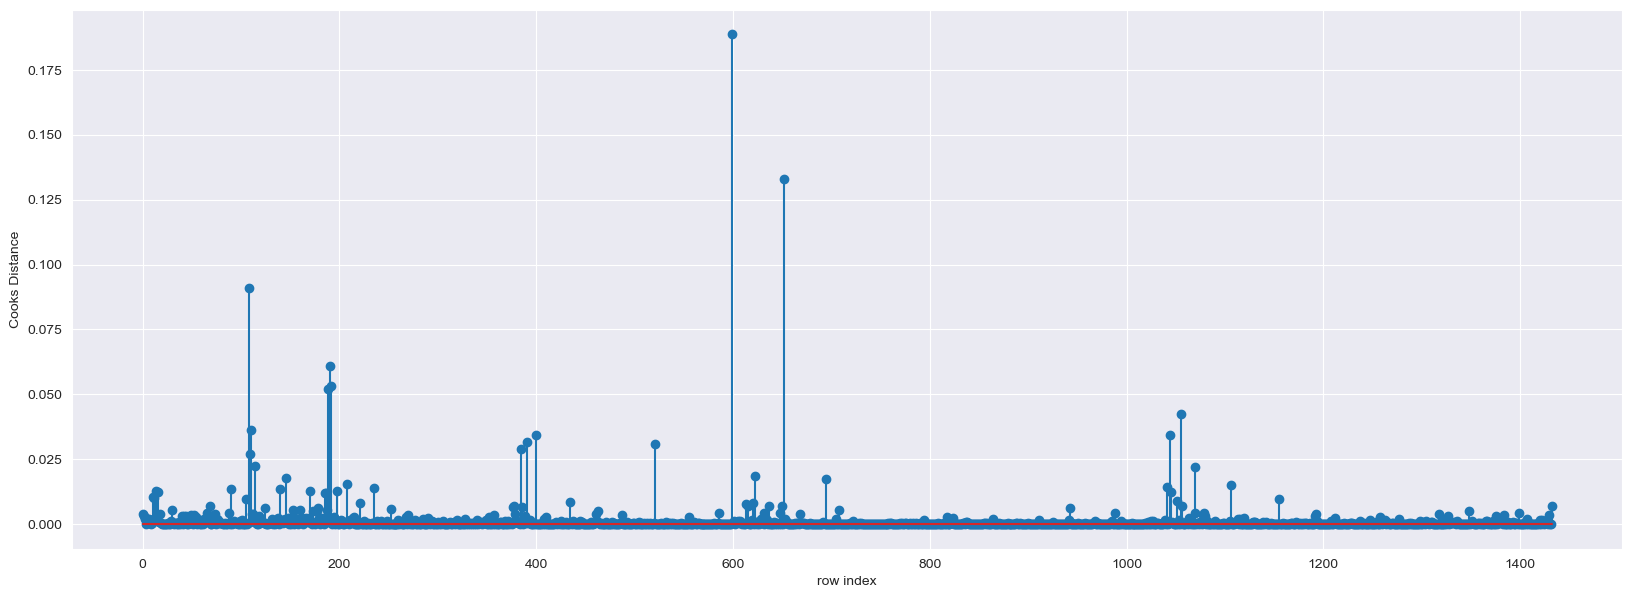

In [153]:
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(m,5))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [154]:
np.argmax(m),np.max(m)

(599, 0.18867874139686563)

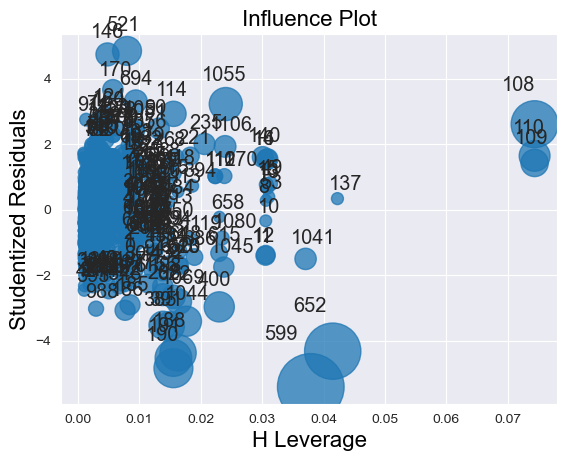

In [155]:
influence_plot(model)
plt.show()


In [157]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.0209351011863224

In [159]:
data[data.index.isin([599])]

,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
599,7500,1,90,2000,3,5,64,1260,50


In [160]:
data= data.drop(data.index[[599]],axis = 0).reset_index(drop = True)
data

,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
0,13500,46986,90,2000,3,5,210,1165,23
1,13750,72937,90,2000,3,5,210,1165,23
2,13950,41711,90,2000,3,5,210,1165,24
3,14950,48000,90,2000,3,5,210,1165,26
4,13750,38500,90,2000,3,5,210,1170,30
...,...,...,...,...,...,...,...,...,...
1427,7500,20544,86,1300,3,5,69,1025,69
1428,10845,19000,86,1300,3,5,69,1015,72
1429,8500,17016,86,1300,3,5,69,1015,71
1430,7250,16916,86,1300,3,5,69,1015,70


In [164]:
model= sms.ols("Price~Age+Weight+HP+cc+QT",data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1907.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        13:58:10   Log-Likelihood:                -12307.
No. Observations:                1432   AIC:                         2.463e+04
Df Residuals:                    1426   BIC:                         2.466e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.309e+04   1221.766    -10.711      0.000   -1.55e+04   -1.07e+04
Age         -128.7742      2.310    -55.739      0.000    -133.306    -124.242
Weight        31.4572      1.312     23.976      0.000      28.883      34.031
HP            46.1468      2.753     16.760      0.000      40.746      51.548
cc            -4.8551      0.305    -15.908      0.000      -5.454      -4.256
QT             2.6869      1.461      1.839      0.066      -0.179       5.553
==============================================================================
Omnibus:                       71.219   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.324
Skew:                          -0.093   Prob(JB):                     2.92e-52
Kurtosis:                       4.986   Cond. No.                     6.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
(n,_)= model.get_influence().cooks_distance
m

array([4.02599916e-03, 3.13665411e-03, 2.09722879e-03, ...,
       2.61053543e-04, 5.56034134e-05, 7.08588377e-03])

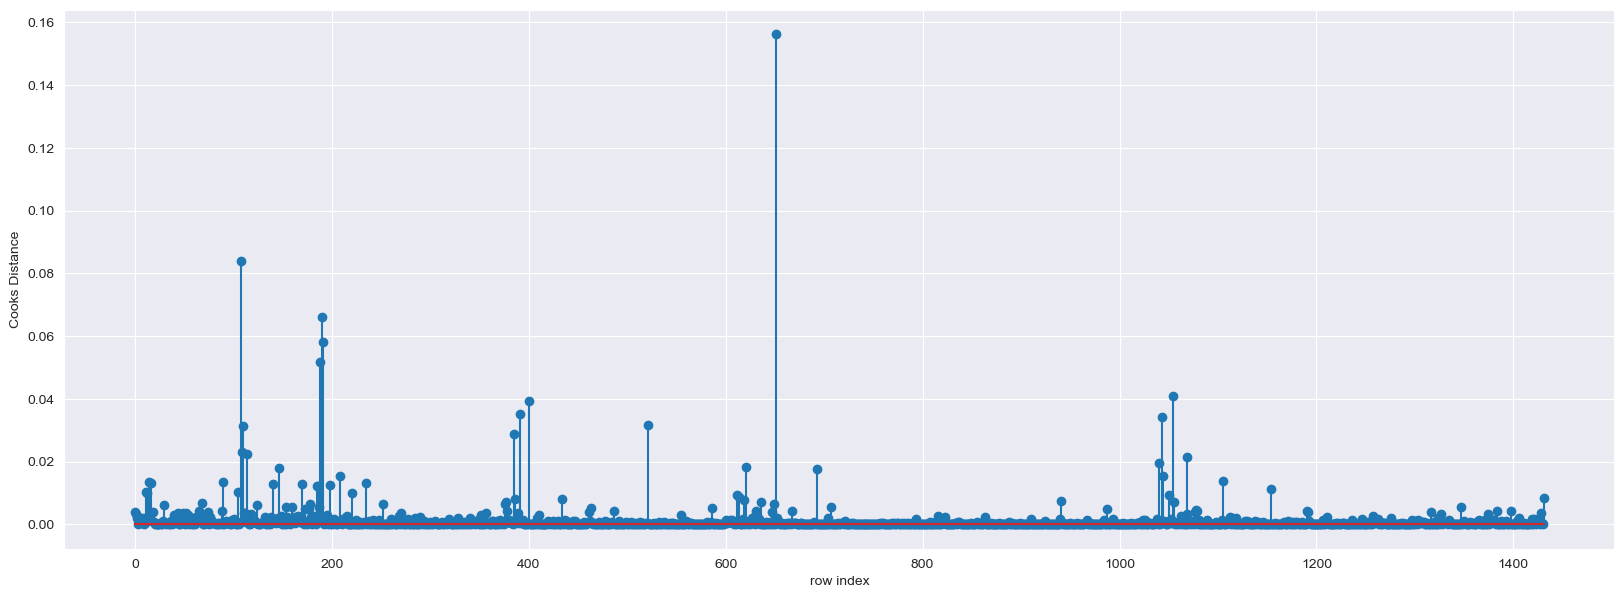

In [170]:
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(n,5))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [172]:
np.argmax(n),np.max(n)

(651, 0.15625201896071086)

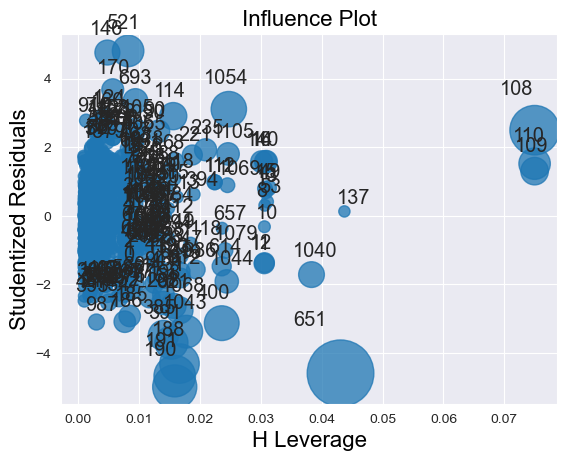

In [173]:
influence_plot(model)
plt.show()

In [174]:
data[data.index.isin([651])]

,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
651,6950,114383,90,2000,3,5,64,1260,65


In [175]:
data= data.drop(data.index[[651]],axis = 0).reset_index(drop = True)
data


,Price,KM,HP,cc,Doors,Gears,QT,Weight,Age
0,13500,46986,90,2000,3,5,210,1165,23
1,13750,72937,90,2000,3,5,210,1165,23
2,13950,41711,90,2000,3,5,210,1165,24
3,14950,48000,90,2000,3,5,210,1165,26
4,13750,38500,90,2000,3,5,210,1170,30
...,...,...,...,...,...,...,...,...,...
1426,7500,20544,86,1300,3,5,69,1025,69
1427,10845,19000,86,1300,3,5,69,1015,72
1428,8500,17016,86,1300,3,5,69,1015,71
1429,7250,16916,86,1300,3,5,69,1015,70


In [179]:
model= sms.ols("Price~Age+Weight+HP+cc+QT",data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1936.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        14:02:32   Log-Likelihood:                -12288.
No. Observations:                1431   AIC:                         2.459e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.407e+04   1232.092    -11.422      0.000   -1.65e+04   -1.17e+04
Age         -127.8810      2.302    -55.542      0.000    -132.398    -123.365
Weight        32.4843      1.322     24.573      0.000      29.891      35.077
HP            44.8559      2.749     16.320      0.000      39.464      50.248
cc            -4.8140      0.303    -15.878      0.000      -5.409      -4.219
QT             1.6164      1.470      1.100      0.272      -1.266       4.499
==============================================================================
Omnibus:                       64.419   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.793
Skew:                          -0.059   Prob(JB):                     5.58e-45
Kurtosis:                       4.845   Cond. No.                     6.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
model.rsquared,model.aic

(0.8716770165243425, 24588.87018565652)